In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import chi2_contingency,chi2

In [ ]:
from google.colab import drive
mount_point = '/content/drive'
drive.mount(mount_point)
df = pd.read_csv('/content/drive/My Drive/Ramadan_Desserts.csv')

Mounted at /content/drive


In [ ]:
df.head()

,Previous Order,Pricing,Rating,Best Place,Most Desired
0,BreadFast,Fairly Priced,5,BreadFast,Fati's
1,Crème,Over Priced,5,Crème,BreadFast
2,Sale Sucre,Fairly Priced,5,BreadFast,Voila
3,Fati's,Fairly Priced,3,BreadFast,NudeBakery
4,Tseppas,Over Priced,4,Tseppas,Fati's


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Previous Order  56 non-null     object
 1   Pricing         56 non-null     object
 2   Rating          56 non-null     int64 
 3   Best Place      55 non-null     object
 4   Most Desired    56 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.3+ KB


In [ ]:
df = df.dropna()

In [ ]:
prev = df['Previous Order'].values

In [ ]:
df['Previous Order'] = np.array([item.strip() for item in prev])

In [ ]:
df['Previous Order'].unique()

array(['BreadFast', 'Crème', 'Sale Sucre', "Fati's", 'Tseppas', 'Blabn',
       'Sultana', 'Étoile', 'Tortina', 'Sedra', 'Mandarine koueider',
       'Elabd', 'NudeBakery', 'Voila'], dtype=object)

In [ ]:
df["Best Place"].unique()

array(['BreadFast', 'Crème ', 'Tseppas', 'Sultana', 'NudeBakery',
       'Thomas', 'Blabn', 'Etoile ', 'Domiaty', 'Sedra', 'Tortina',
       "Fati's", 'Mandarine koueider', 'Exception', 'Kouidar', 'Voila'],
      dtype=object)

<ipython-input-10-6255464ccfa6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=previous_order_counts.index, y=previous_order_counts.values, palette='viridis')


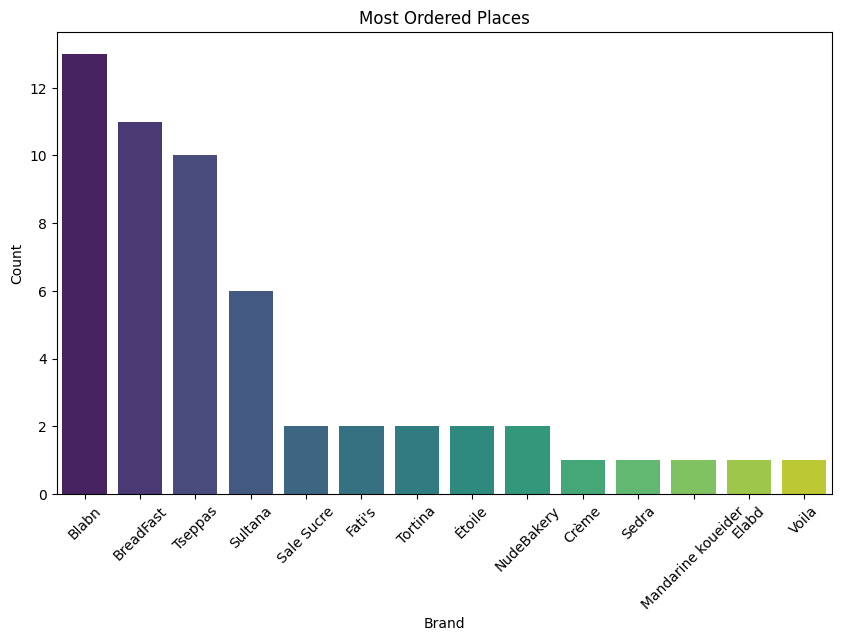

In [ ]:
previous_order_counts = df['Previous Order'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=previous_order_counts.index, y=previous_order_counts.values, palette='viridis')
plt.title('Most Ordered Places')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-7aa11c1edb98>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_place_counts.index, y=best_place_counts.values, palette='viridis')


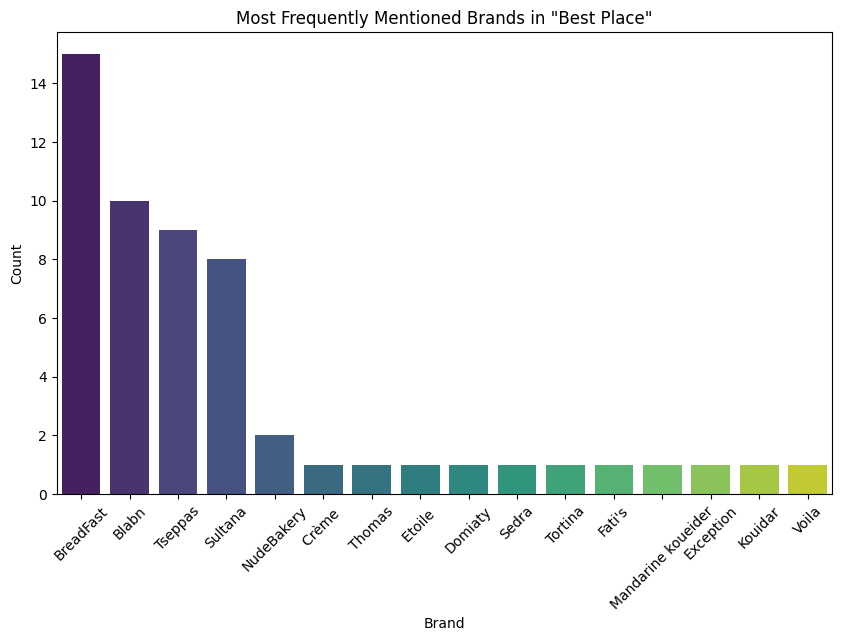

In [ ]:
best_place_counts = df['Best Place'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=best_place_counts.index, y=best_place_counts.values, palette='viridis')
plt.title('Most Frequently Mentioned Brands in "Best Place"')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-c03748a111f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_desired_counts.index, y=most_desired_counts.values, palette='plasma')


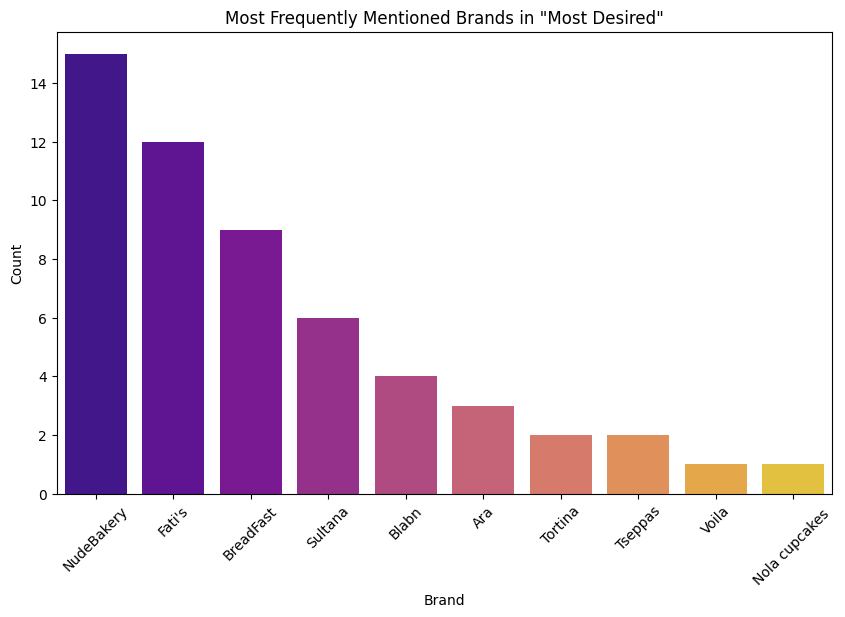

In [ ]:
most_desired_counts = df['Most Desired'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=most_desired_counts.index, y=most_desired_counts.values, palette='plasma')
plt.title('Most Frequently Mentioned Brands in "Most Desired"')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

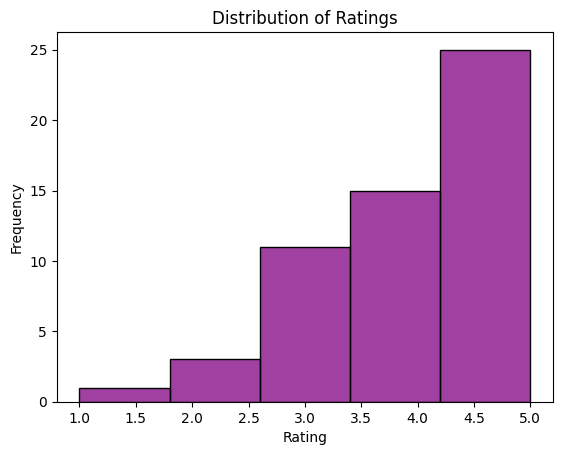

In [ ]:
# Histogram of ratings
sns.histplot(df['Rating'], bins=5, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

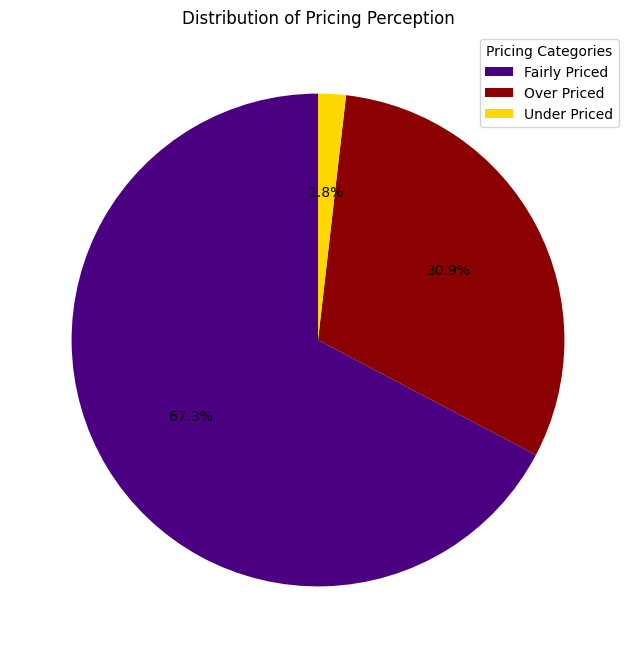

In [33]:
pricing_counts = df['Pricing'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pricing_counts, colors=['#4B0082', '#8B0000', '#FFD700'], startangle=90,autopct='%1.1f%%')
plt.title('Distribution of Pricing Perception')

# Add a legend
plt.legend(pricing_counts.index, title="Pricing Categories", loc="best")
plt.show()


<ipython-input-15-b29892e9bc65>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='viridis')


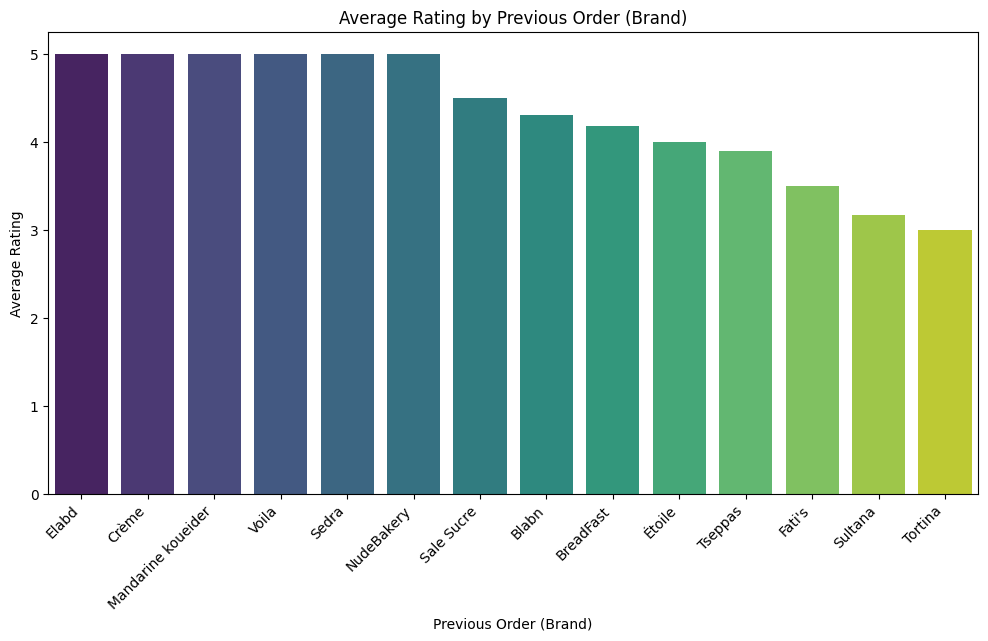

In [15]:
# Group by 'Previous Order' and calculate average rating
average_ratings = df.groupby('Previous Order')['Rating'].mean().sort_values(ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='viridis')
plt.title('Average Rating by Previous Order (Brand)')
plt.xlabel('Previous Order (Brand)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-16-c9fd2e3ff1b2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_by_pricing.index, y=average_ratings_by_pricing.values, palette='coolwarm')


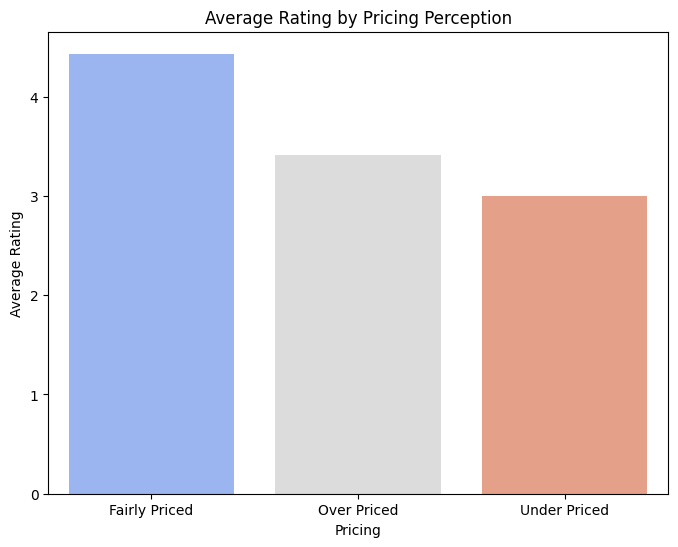

In [16]:
average_ratings_by_pricing = df.groupby('Pricing')['Rating'].mean().sort_values(ascending=False)

# Create a bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=average_ratings_by_pricing.index, y=average_ratings_by_pricing.values, palette='coolwarm')
plt.title('Average Rating by Pricing Perception')
plt.xlabel('Pricing')
plt.ylabel('Average Rating')
plt.show()

HYPOTHESIS TEST:
This test determines whether there is a significant association between (Best Place) & (Most Desired)

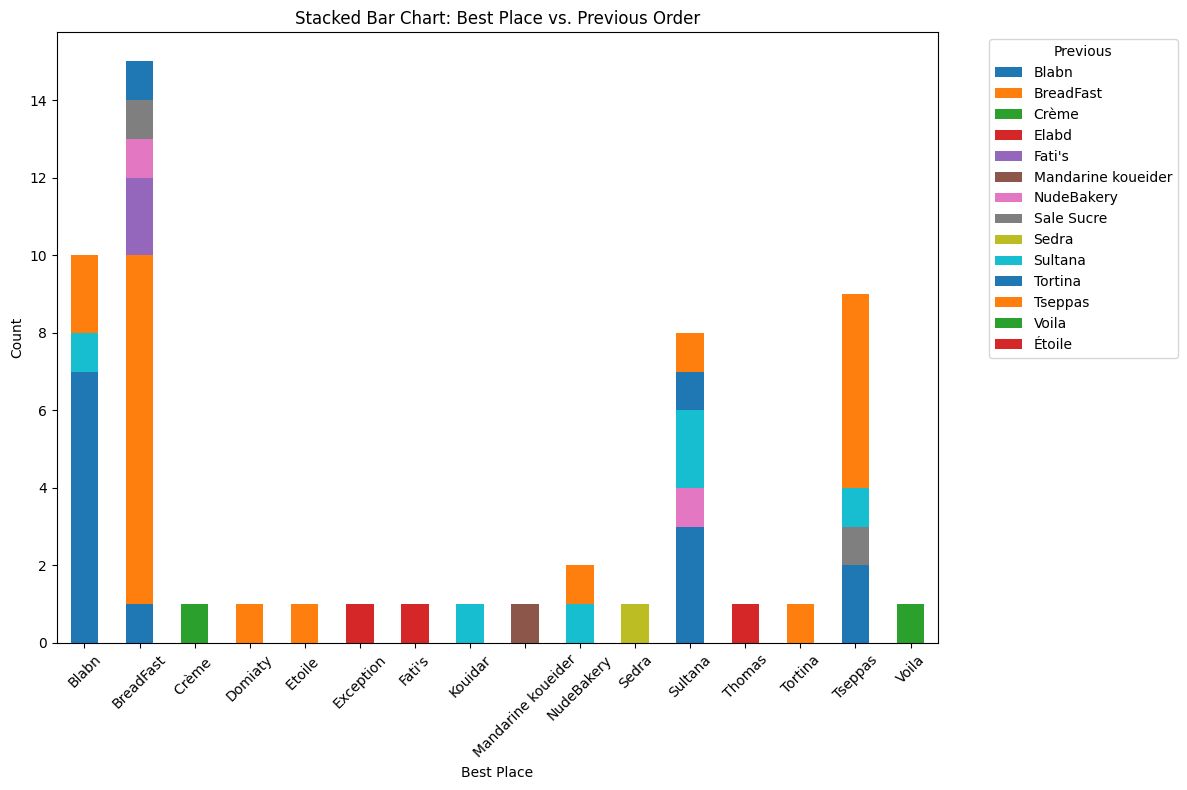

In [29]:
contingency_table = pd.crosstab(df['Best Place'], df['Previous Order'])

# Create a stacked bar chart
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8), rot=45)

# Customize the legend
ax.legend(title='Previous', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Add labels and title
plt.xlabel('Best Place')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Best Place vs. Previous Order')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [32]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print the results
print("\nChi-square test results:")
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

# Interpret based on p-value
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (there is a significant association).")
else:
    print("\nConclusion: Fail to reject the null hypothesis (no significant association).")


Chi-square test results:
Chi-square statistic: 409.100462962963
P-value: 2.764904838695368e-17
Degrees of freedom: 195

Conclusion: Reject the null hypothesis (there is a significant association).
